In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\project_september\data_cardiovascular_risk.csv")

In [3]:
df.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [4]:
df = df.set_index('id')

In [5]:
df.shape

(3390, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


As far as I can think, any disease or ailment can never be predicted or analyzed on the basis of any person's education level for obvious reasons, education is no parameter for any disease to happen to anyone. I think it's better to drop the column altogether since it will not help us in our prediction model.

In [7]:
df = df.drop("education", axis=1)

In [8]:
df

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


In [9]:
df.isna().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

### Handling the missing values

There are missing values present in 5 columns, let's handle them one by one

## cigsPerDay - generally how many cigarettes a person smokes in a day

In [10]:
df['cigsPerDay'].describe()

count    3368.000000
mean        9.069477
std        11.879078
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [11]:
# plotting the normal distribution curve
from scipy.stats import norm
def normal_dist(data):
    mean = np.mean(data)
    std = np.std(data)

    #creating a histogram plot
    plt.hist(data,bins=10,alpha=0.5,density=True)

    # Overlay a fitted normal distribution curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax,100)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, 'k', linewidth=1)

    plt.title("Normal Distribution Plot")
    plt.show()




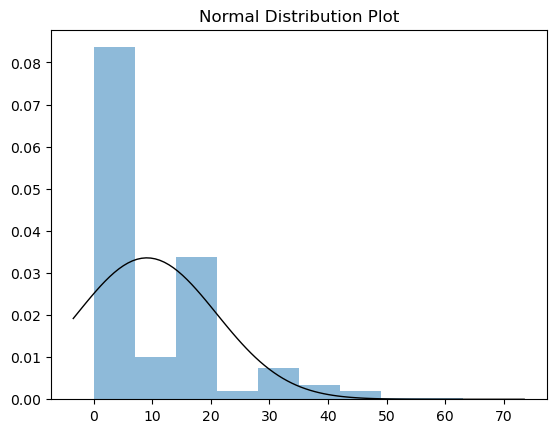

In [12]:
normal_dist(df['cigsPerDay'])

Instead of just filling the missing values of cigarette per day with its mean, we must check that weather these missing values are even smokers or not

In [13]:
cig_null = df['cigsPerDay'].isnull()
cor_smoke = df.loc[cig_null, "is_smoking"]

print(cor_smoke)

id
422     YES
466     YES
469     YES
491     YES
538     YES
767     YES
1461    YES
1467    YES
1597    YES
1986    YES
2031    YES
2087    YES
2240    YES
2284    YES
2527    YES
2638    YES
2648    YES
2723    YES
2879    YES
2945    YES
3301    YES
3378    YES
Name: is_smoking, dtype: object


## So every missing value of person turned out to be smoker. I think it will be okay to fill the missing values with median.

In [14]:
cig_med = df['cigsPerDay'].median()

In [15]:
df['cigsPerDay'].fillna(cig_med, inplace=True)

In [16]:
df['cigsPerDay'].isna().sum()

0

## BPMeds

The column tells us whether the person is on the Blood Pressure medication, there are two values 0- meaning no and 1-meaning yes

In [17]:
df['BPMeds'].nunique()

2

In [18]:
df['BPMeds'].isna().sum()

44

These missing values are critical, because just assuming that a person is on medication or not is risky. I'll be dropping the missing values since it is not specified.

In [19]:
df['BPMeds'].dropna() 

## TotChol - tells us about the cholestrol level of a person

In [20]:
df['totChol']

id
0       221.0
1       212.0
2       250.0
3       233.0
4       241.0
        ...  
3385    261.0
3386    199.0
3387    352.0
3388    191.0
3389    288.0
Name: totChol, Length: 3390, dtype: float64

In [21]:
df['totChol'].isna().sum()

38

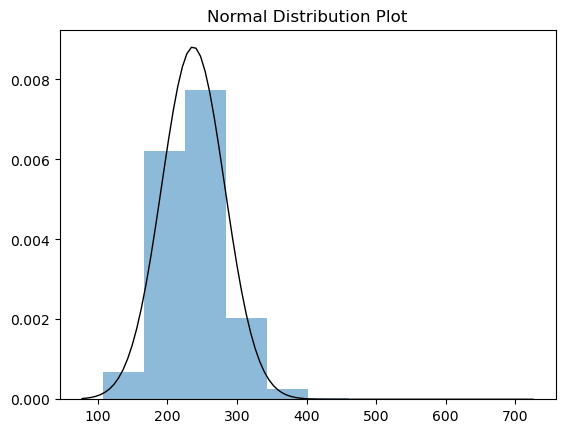

In [22]:
normal_dist(df['totChol'])

In [23]:
df['totChol'].mean()

237.07428400954655

In [24]:
df['totChol'].median()

234.0

In [25]:
df['totChol'].fillna(df['totChol'].mean(), inplace=True)

In [26]:
df.isna().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

## BMI - Body Mass Index 
This is the measured by dividing the square of person's height(in m or ft) by weight of the person(in pounds or kg)

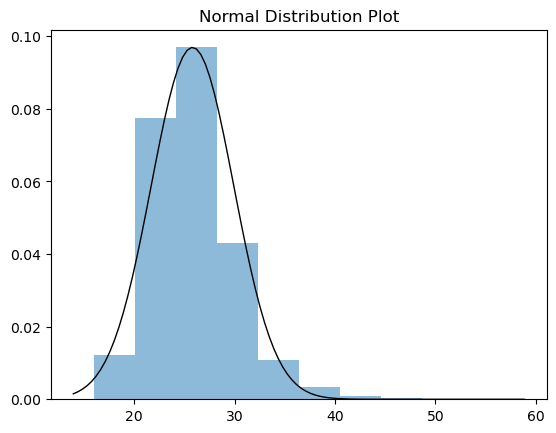

In [27]:
normal_dist(df['BMI'])

In [28]:
df['BMI'].mean()

25.7949644549763

In [29]:
df['BMI'].median()

25.38

In [30]:
df['BMI'].fillna(df['BMI'].mean(),inplace=True)

## Glucose

In [31]:
df['glucose'].isna().sum()

304

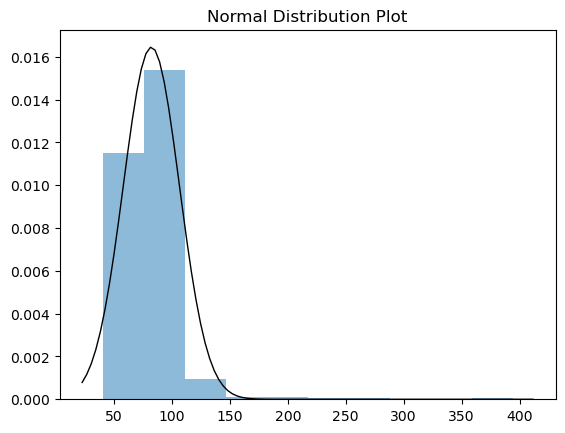

In [32]:
normal_dist(df['glucose'])

In [33]:
df['glucose'].mean()

82.08651976668827

In [34]:
df['glucose'].median()

78.0

In [35]:
df['glucose'].fillna(df['glucose'].mean(), inplace= True)

## HeartRate

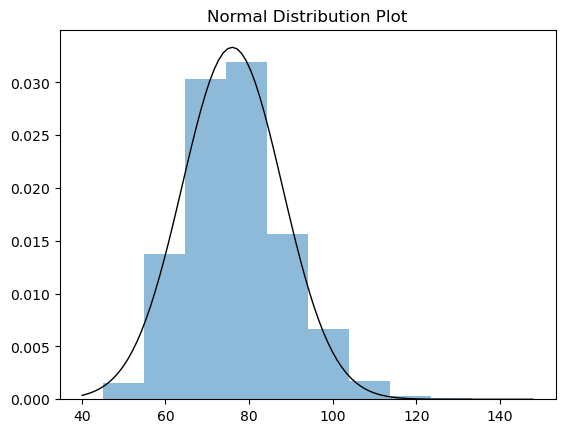

In [36]:
normal_dist(df['heartRate'])

In [37]:
df['heartRate'].fillna(df['heartRate'].mean(), inplace= True)

## -------------------------------------------------------------------------------------------------------- 

## EDA cont. -

Now let's handle columns like - sex and is_smoking. These columns have 2 unique values and are categorical column.
I think making them numerical using pd.get_dummies will give us more data to be used in our prediction

I am converting the 'sex' columns to numeric, in which Females will be coded as 0 and Males as 1, and in 'is_smoking' column Yes as 1 and No as 0

In [38]:
df = pd.get_dummies(df, columns=['sex', 'is_smoking'], drop_first=True, dtype=int)

In [39]:
df

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M,is_smoking_YES
id,,,,,,,,,,,,,,,
0,64,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1,0,1
1,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,1,0
2,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,0,1
3,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1,1,1
4,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,0.0,0.0,0,0,0,261.0,123.5,79.0,29.280000,70.0,103.0,0,0,0
3386,46,0.0,0.0,0,0,0,199.0,102.0,56.0,21.960000,80.0,84.0,0,0,0
3387,44,3.0,0.0,0,1,0,352.0,164.0,119.0,28.920000,73.0,72.0,1,1,1


In [40]:
df.rename(columns = {"sex_M":"Gender", "is_smoking_YES":"Smoker"}, inplace = True)

In [41]:
df

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Gender,Smoker
id,,,,,,,,,,,,,,,
0,64,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1,0,1
1,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,1,0
2,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,0,1
3,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1,1,1
4,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,0.0,0.0,0,0,0,261.0,123.5,79.0,29.280000,70.0,103.0,0,0,0
3386,46,0.0,0.0,0,0,0,199.0,102.0,56.0,21.960000,80.0,84.0,0,0,0
3387,44,3.0,0.0,0,1,0,352.0,164.0,119.0,28.920000,73.0,72.0,1,1,1


In [42]:
# moving the target column to last
move_target = df.pop("TenYearCHD")

In [43]:
df.insert(14, "TenYearCHD", move_target)


In [44]:
df

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Gender,Smoker,TenYearCHD
id,,,,,,,,,,,,,,,
0,64,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,0,1,1
1,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,1,0,0
2,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,1,0
3,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1,1,1
4,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,0.0,0.0,0,0,0,261.0,123.5,79.0,29.280000,70.0,103.0,0,0,0
3386,46,0.0,0.0,0,0,0,199.0,102.0,56.0,21.960000,80.0,84.0,0,0,0
3387,44,3.0,0.0,0,1,0,352.0,164.0,119.0,28.920000,73.0,72.0,1,1,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   cigsPerDay       3390 non-null   float64
 2   BPMeds           3390 non-null   float64
 3   prevalentStroke  3390 non-null   int64  
 4   prevalentHyp     3390 non-null   int64  
 5   diabetes         3390 non-null   int64  
 6   totChol          3390 non-null   float64
 7   sysBP            3390 non-null   float64
 8   diaBP            3390 non-null   float64
 9   BMI              3390 non-null   float64
 10  heartRate        3390 non-null   float64
 11  glucose          3390 non-null   float64
 12  Gender           3390 non-null   int32  
 13  Smoker           3390 non-null   int32  
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int32(2), int64(5)
memory usage: 397.3 KB



## Exploration of Data- Visualization

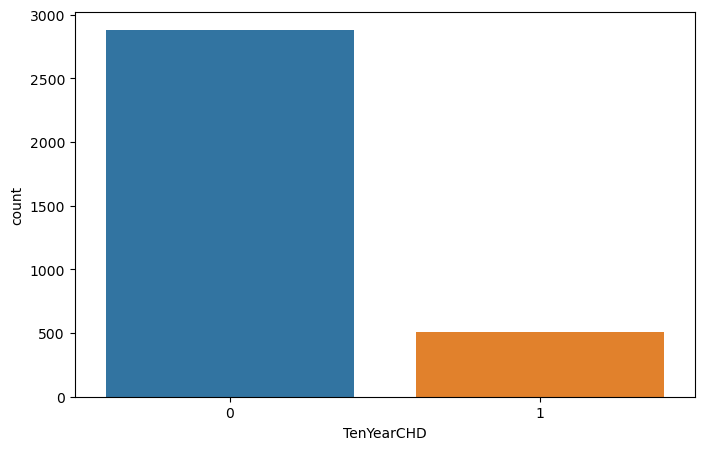

In [222]:
plt.figure(figsize = (8,5))
sns.countplot(data = df, x="TenYearCHD")
plt.show()

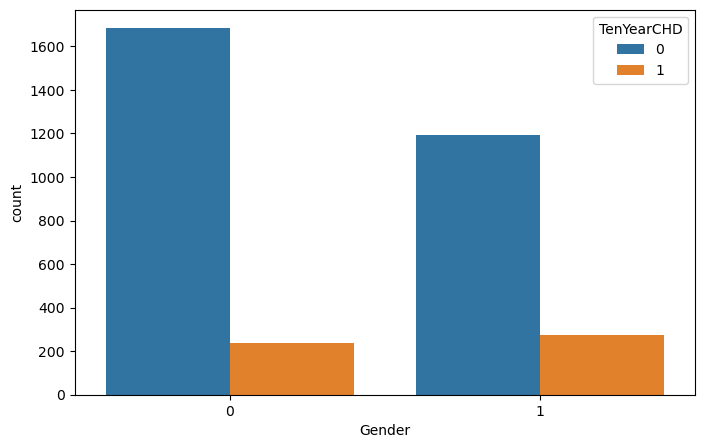

In [453]:
plt.figure(figsize = (8,5))
sns.countplot(data=df,x= "Gender", hue="TenYearCHD")
plt.show()

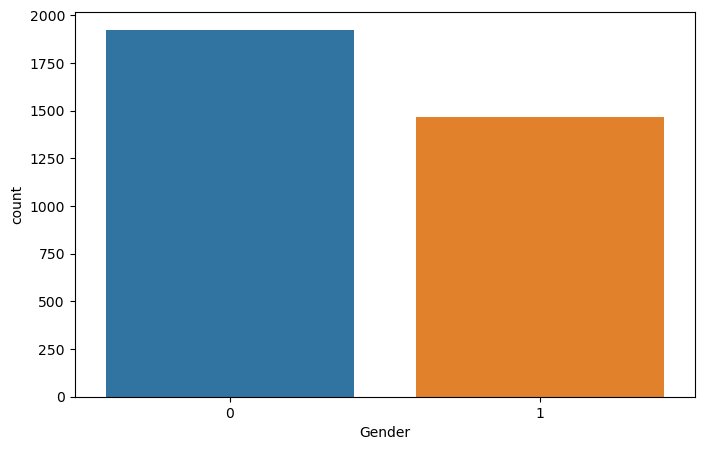

In [131]:
plt.figure(figsize = (8,5))
sns.countplot(data=df,x= "Gender")
plt.show()

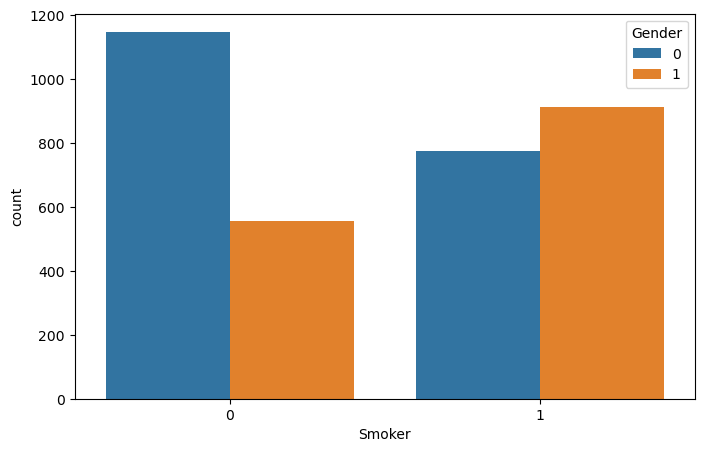

In [130]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Smoker", hue="Gender")
plt.show()

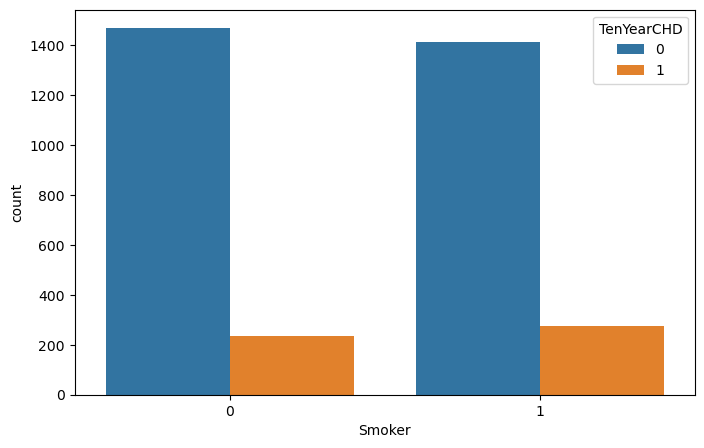

In [129]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Smoker", hue="TenYearCHD")
plt.show()

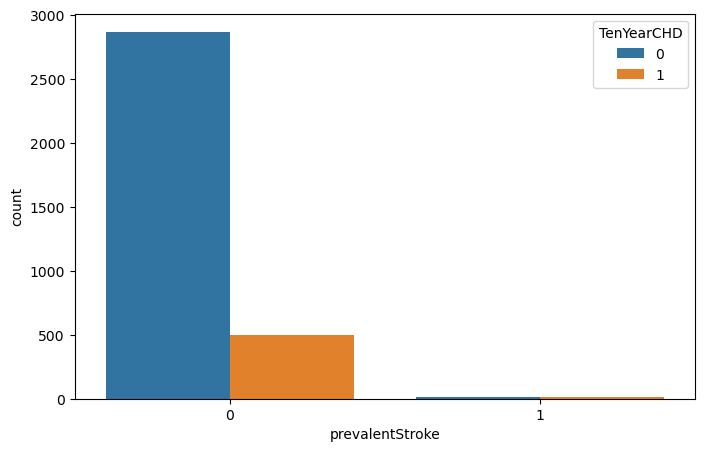

In [137]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="prevalentStroke", hue="TenYearCHD")
plt.show()

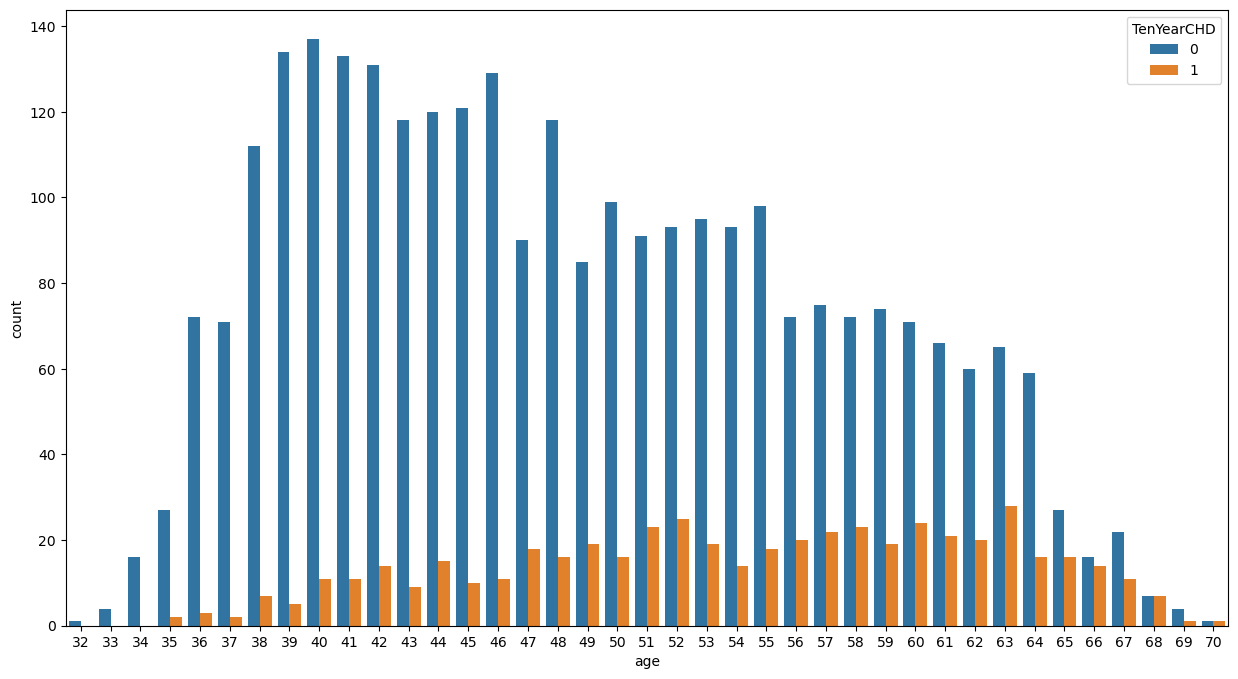

In [146]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x="age",hue="TenYearCHD")
plt.show()

In [165]:
df.columns

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'Gender', 'Smoker', 'TenYearCHD'],
      dtype='object')

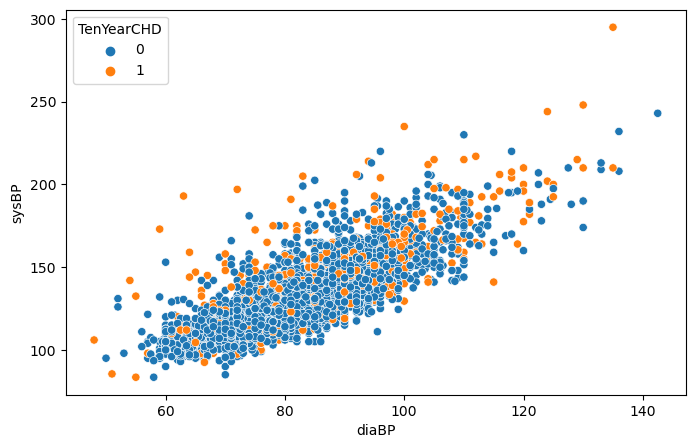

In [167]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x="diaBP",y='sysBP',hue="TenYearCHD")
plt.show()

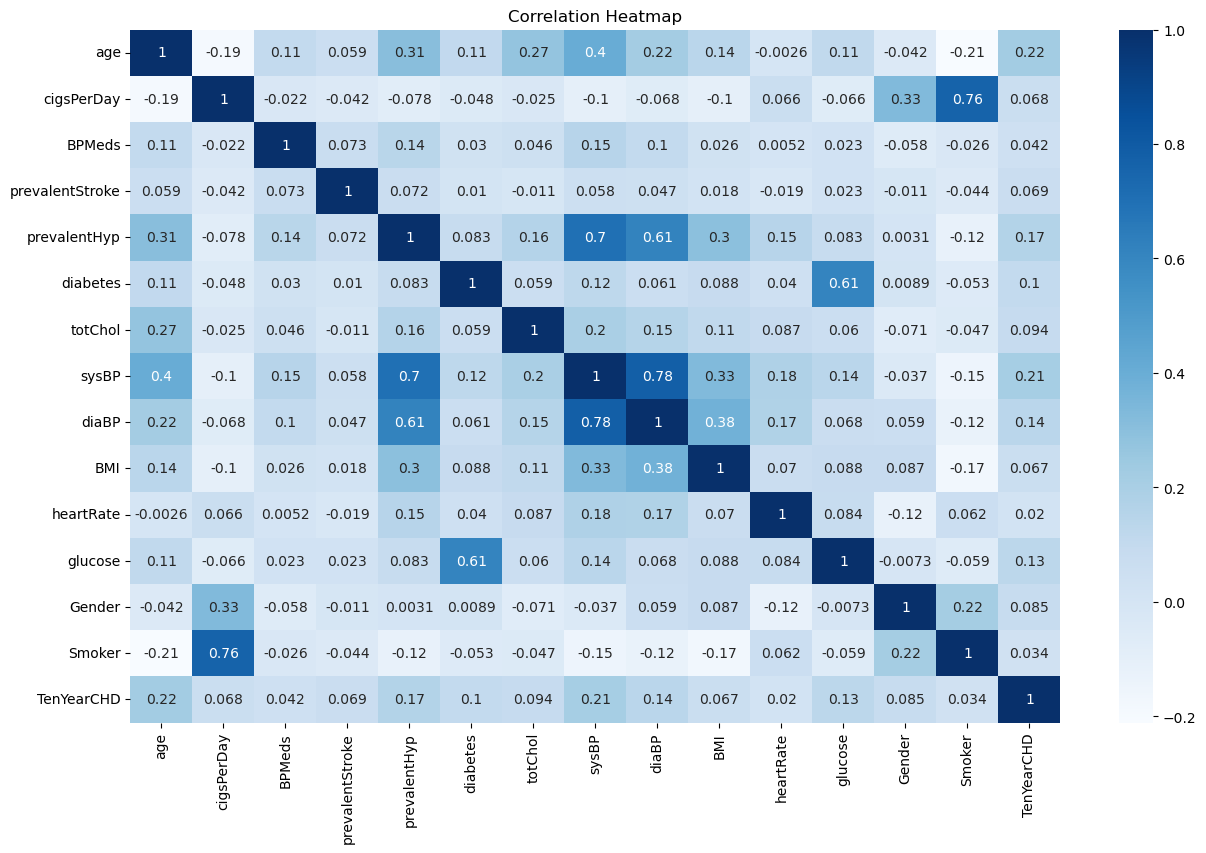

In [164]:
## Checking for the correlation
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True,cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

#### In the correlation map we can see that there are columns like smoker and cigsPerDay having more than 0.75 correlation coefficient, I would include the columns in my model carefully.

## MODEL BUILDING

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


In [80]:
df.columns

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'Gender', 'Smoker', 'TenYearCHD'],
      dtype='object')

In [367]:
# Splitting the data - target data and independent feature
X = df[['age', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose',
       'Gender', 'cigsPerDay']]
Y = df["TenYearCHD"]


In [368]:
Y.shape

(3390,)

In [369]:
X.shape

(3390, 13)

In [370]:
x_train,x_test, y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=42) 

In [371]:
scaler = StandardScaler()

In [372]:
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [373]:
LR_mod = LogisticRegression()

In [374]:
from sklearn.model_selection import GridSearchCV

In [375]:
param = {"penalty":["l1","l2","elasticnet"], "C":[1,2,3,5,8,10,12,15,20,30,40,50,60],
         "max_iter":[10,20,30,40,50,100,200,300],"solver":["lbfgs","liblinear"],"random_state":[40,50,60,70,80,90,100]}

In [376]:
classifier = GridSearchCV(LR_mod, param_grid=param, scoring = "precision", cv=5)

In [377]:
classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 5, 8, 10, 12, 15, 20, 30, 40, 50, 60],
                         'max_iter': [10, 20, 30, 40, 50, 100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [40, 50, 60, 70, 80, 90, 100],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='precision')

In [378]:
print(classifier.best_params_)

{'C': 2, 'max_iter': 10, 'penalty': 'l2', 'random_state': 40, 'solver': 'liblinear'}


In [379]:
print(classifier.best_score_)

0.6964069264069264


In [380]:
best_LR = LogisticRegression(penalty="l2", solver="liblinear",C=2,max_iter=10,random_state=40)

In [381]:
best_LR.fit(X_train,y_train)

LogisticRegression(C=2, max_iter=10, random_state=40, solver='liblinear')

In [382]:
Pred_LR = best_LR.predict(X_test)

## Evaluating the Model

In [383]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [384]:
accu_score = accuracy_score(y_test,Pred_LR)
accu_score

0.8657817109144543

In [385]:
con_mat = confusion_matrix(y_test, Pred_LR)
con_mat

array([[578,   3],
       [ 88,   9]], dtype=int64)

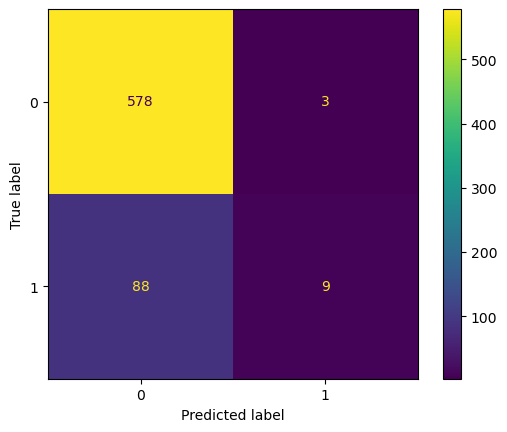

In [386]:
ConfusionMatrixDisplay(confusion_matrix= con_mat).plot()

In [387]:
print(classification_report(y_test,Pred_LR))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       581
           1       0.75      0.09      0.17        97

    accuracy                           0.87       678
   macro avg       0.81      0.54      0.55       678
weighted avg       0.85      0.87      0.82       678



In [450]:
# changing the threshold
Threshold = 0.3
y_pred = (best_LR.predict_proba(X_test)[:, 1] >= Threshold).astype(int)

In [451]:
accuracy2 = accuracy_score(y_test,y_pred)
accuracy2

0.8348082595870207

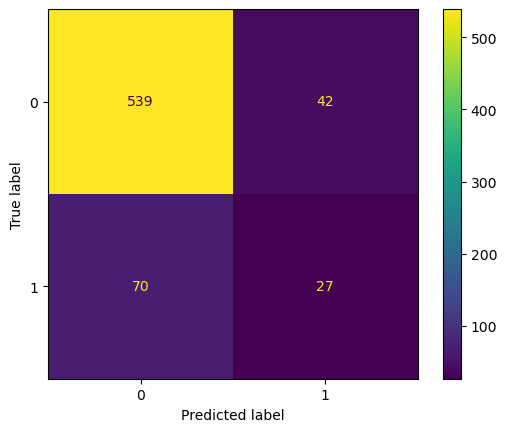

In [452]:
con_mat4 = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(con_mat4).plot()

## Decision Tree

In [388]:
model_DT = DecisionTreeClassifier()

In [389]:
Param2 = {"criterion": ["gini","entropy"], "max_depth":[10,12,13,15,17,18,20,25,30],
          "max_features":["auto","log2","sqrt"],"class_weight":[{0:1.0, 1:10},{0:0.5,1:10},{0:10,1:50},{0:5,1:10}]}

In [390]:
grid2  = GridSearchCV(model_DT, param_grid=Param2 , scoring="precision", cv=5 )

In [391]:
grid2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 1.0, 1: 10}, {0: 0.5, 1: 10},
                                          {0: 10, 1: 50}, {0: 5, 1: 10}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 13, 15, 17, 18, 20, 25, 30],
                         'max_features': ['auto', 'log2', 'sqrt']},
             scoring='precision')

In [392]:
print(grid2.best_params_)

{'class_weight': {0: 5, 1: 10}, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt'}


In [393]:
print(grid2.best_score_)

0.2847871960775187


In [394]:
DT_good = DecisionTreeClassifier(criterion='', max_depth=10, max_features='sqrt', class_weight={0:5,1:10})

In [395]:
DT_good.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 5, 1: 10}, max_depth=10,
                       max_features='sqrt')

In [396]:
DT_pred = DT_good.predict(X_test)

In [397]:
accuracy_DT = accuracy_score(y_test,DT_pred)
accuracy_DT

0.8230088495575221

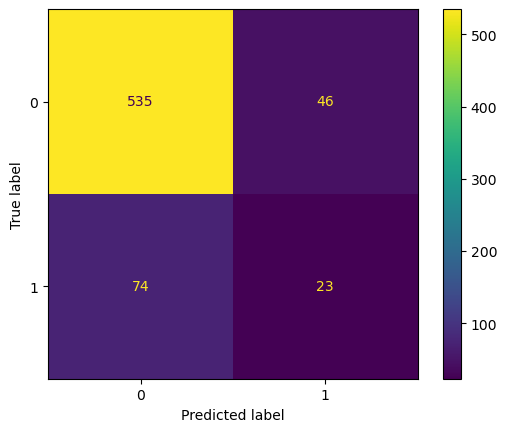

In [398]:
con_mat2 = confusion_matrix(y_test, DT_pred)
ConfusionMatrixDisplay(con_mat2).plot()

In [399]:
print(classification_report(y_test,DT_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       581
           1       0.33      0.24      0.28        97

    accuracy                           0.82       678
   macro avg       0.61      0.58      0.59       678
weighted avg       0.80      0.82      0.81       678



## ------------------------------------------------------------------------------------------------------------------------

## Random Forest

In [400]:
model_RF = RandomForestClassifier()

In [401]:
param3 = {"criterion":["gini","sqrt"],"max_depth":[10,12,15,20,25],
         "random_state":[25,30,40,50,80,100],"class_weight":[{0: 1, 1: 5}, {0: 1, 1: 10}, {0: 1, 1: 2}, {0: 1, 1: 50},{0:0.5,1:2},{0:1,1:100}]}

In [402]:
grid3 = GridSearchCV( model_RF, param_grid= param3 , scoring="precision", cv= 5)

In [403]:
grid3.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 5}, {0: 1, 1: 10},
                                          {0: 1, 1: 2}, {0: 1, 1: 50},
                                          {0: 0.5, 1: 2}, {0: 1, 1: 100}],
                         'criterion': ['gini', 'sqrt'],
                         'max_depth': [10, 12, 15, 20, 25],
                         'random_state': [25, 30, 40, 50, 80, 100]},
             scoring='precision')

In [404]:
print(grid3.best_params_)

{'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 15, 'random_state': 40}


In [405]:
print(grid3.best_score_)

0.5928571428571429


In [406]:
best_RF = RandomForestClassifier(criterion='gini', max_depth=15, random_state=40,class_weight={0:1,1:2})

In [407]:
best_RF.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=15, random_state=40)

In [408]:
RF_pred = best_RF.predict(X_test)

In [409]:
accu_RF = accuracy_score(RF_pred,y_test)
accu_RF

0.8613569321533924

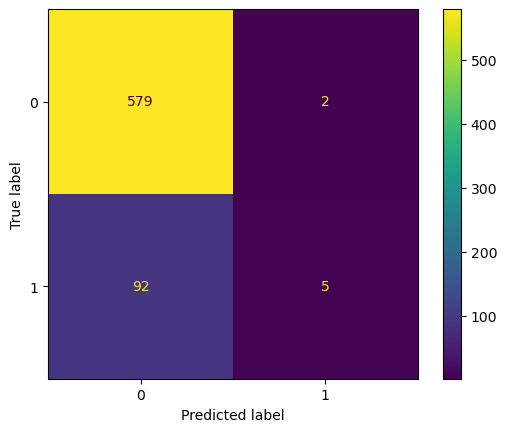

In [410]:
con_mat3 = confusion_matrix(y_test, RF_pred)
ConfusionMatrixDisplay(con_mat3).plot()

In [411]:
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       581
           1       0.71      0.05      0.10        97

    accuracy                           0.86       678
   macro avg       0.79      0.52      0.51       678
weighted avg       0.84      0.86      0.81       678



# ------------------------------------------------------------------------------------------------------